#### 用于处理kde和merger分布的问题

In [1]:
from astropy.coordinates import SkyCoord
import seaborn as seaborn
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import Planck15 as cosmo


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

#### 考察merger分布，以归一化KDE为指标

In [200]:
data_add_merger=pd.read_csv('data_add_merger.csv')
data_add_merger['ssfr']=data_add_merger['lp_SFR_med']-data_add_merger['lp_mass_best']
data_add_merger_sort_z=data_add_merger.sort_values('photoz')

# 按照红移大小分bin，结果为sub_data_{}

bins=12

c=int(len(data_add_merger_sort_z)/bins)

i=0
while i < bins:
    exec('sub_data_{}=data_add_merger_sort_z.iloc[(i*c):(i+1)*c]'.format(i+1))
    i+=1

In [201]:
# 低红移
l=int(len(sub_data_1)/5)
z_l=sub_data_1.sort_values('ssfr')
z_l_l_ssfr=z_l.iloc[:l]
z_l_h_ssfr=z_l.iloc[-l:]



# 高红移
l=int(len(sub_data_12)/5)
z_h=sub_data_8.sort_values('ssfr')
z_h_l_ssfr=z_h.iloc[:l]
z_h_h_ssfr=z_h.iloc[-l:]




print('hsfr_l_z:{}          {:.3f}'.format(sum(z_l_h_ssfr['merger']),sum(z_l_h_ssfr['merger'])/len(z_l_h_ssfr)))
print('lsfr_l_z:{}          {:.3f}'.format(sum(z_l_l_ssfr['merger']),sum(z_l_l_ssfr['merger'])/len(z_l_l_ssfr)))
print('hsfr_h_z:{}          {:.3f}'.format(sum(z_h_h_ssfr['merger']),sum(z_h_h_ssfr['merger'])/len(z_h_h_ssfr)))
print('lsfr_h_z:{}          {:.3f}'.format(sum(z_h_l_ssfr['merger']),sum(z_h_l_ssfr['merger'])/len(z_h_l_ssfr)))

hsfr_l_z:76          0.113
lsfr_l_z:59          0.088
hsfr_h_z:78          0.116
lsfr_h_z:75          0.111


C:\Users\LiYibo\AppData\Local\Temp\ipykernel_10236\1389174872.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


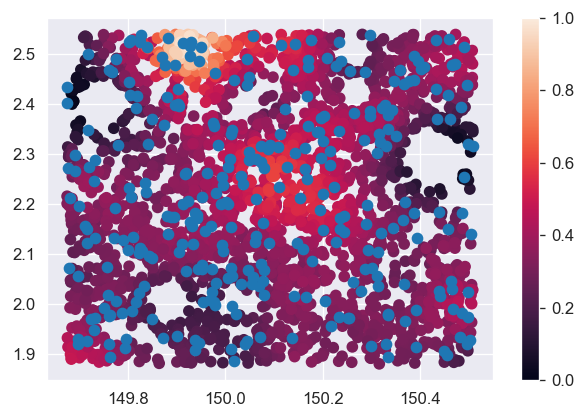

In [202]:
# 考察sub_data_1，merger实际分布
plt.figure(dpi=120)


sub_data_c_t=sub_data_2[sub_data_2['merger']==0]
sub_data_m_t=sub_data_2[sub_data_2['merger']==1]

plt.scatter(sub_data_c_t['RA'],sub_data_c_t['DEC'],c=sub_data_c_t['kde_normalisation'])
plt.scatter(sub_data_m_t['RA'],sub_data_m_t['DEC'])
plt.colorbar()

C:\Users\LiYibo\AppData\Local\Temp\ipykernel_10236\1444818324.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  list_z.append(np.float(np.average(tem['photoz'])))


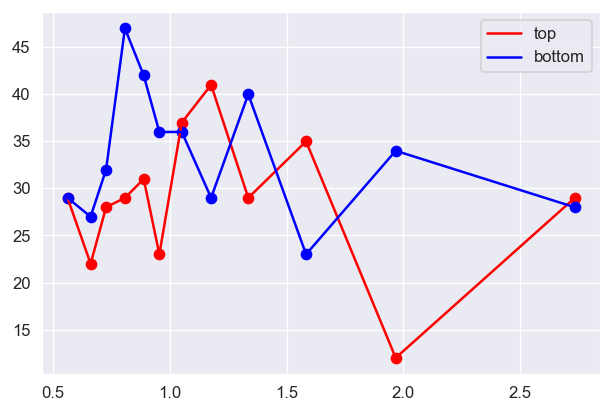

In [203]:
# 考察sub_data_2

# 分组依据:KDE

tem=sub_data_2.sort_values('kde',ascending=False)
t_t=tem.iloc[:200,:]
t_b=tem.iloc[-200:,:]


i=0
list_kde_top,list_kde_botttom=[],[]
list_merger_top,list_merger_botttom=[],[]
list_z=[]



while i < bins:
    exec("tem=sub_data_{}.sort_values('kde',ascending=False)".format(i+1))
    i+=1

    list_z.append(np.float(np.average(tem['photoz'])))

    t_t=tem.iloc[:300,:]
    t_b=tem.iloc[-300:,:]

    list_kde_top.append(np.average(t_t['kde_normalisation']))
    list_kde_botttom.append(np.average(t_b['kde_normalisation']))

    list_merger_top.append(np.sum(t_t['merger']))
    list_merger_botttom.append(np.sum(t_b['merger']))


plt.figure(dpi=120)
plt.plot(list_z[:15],list_merger_top[:15],c='r',label='top')
plt.plot(list_z[:15],list_merger_botttom[:15],c='b',label='bottom')
plt.legend()

plt.scatter(list_z[:15],list_merger_top[:15],c='r')
plt.scatter(list_z[:15],list_merger_botttom[:15],c='b')

#### 考察merger分布，以区域加权归一化KDE为指标

In [206]:
data_add_merger=pd.read_csv('data_add_merger.csv')
data_add_merger_sort_density=data_add_merger.sort_values('density_2000',ascending=False)

data_add_merger_sort_cut_top_density=data_add_merger_sort_density.iloc[1200:]

data_add_merger_sort_cut_top_density_sort_z=data_add_merger_sort_cut_top_density.sort_values('photoz')
# 按照红移大小分bin，结果为sub_data_{}

bins=12
c=int(len(data_add_merger_sort_cut_top_density_sort_z)/bins)

i=0
while i < bins:
    exec('sub_data_{}=data_add_merger_sort_cut_top_density_sort_z.iloc[(i*c):(i+1)*c]'.format(i+1))
    i+=1

C:\Users\LiYibo\AppData\Local\Temp\ipykernel_10236\1197592144.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
C:\Users\LiYibo\AppData\Local\Temp\ipykernel_10236\1197592144.py:32: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  list_z.append(np.float(np.average(tem['photoz'])))


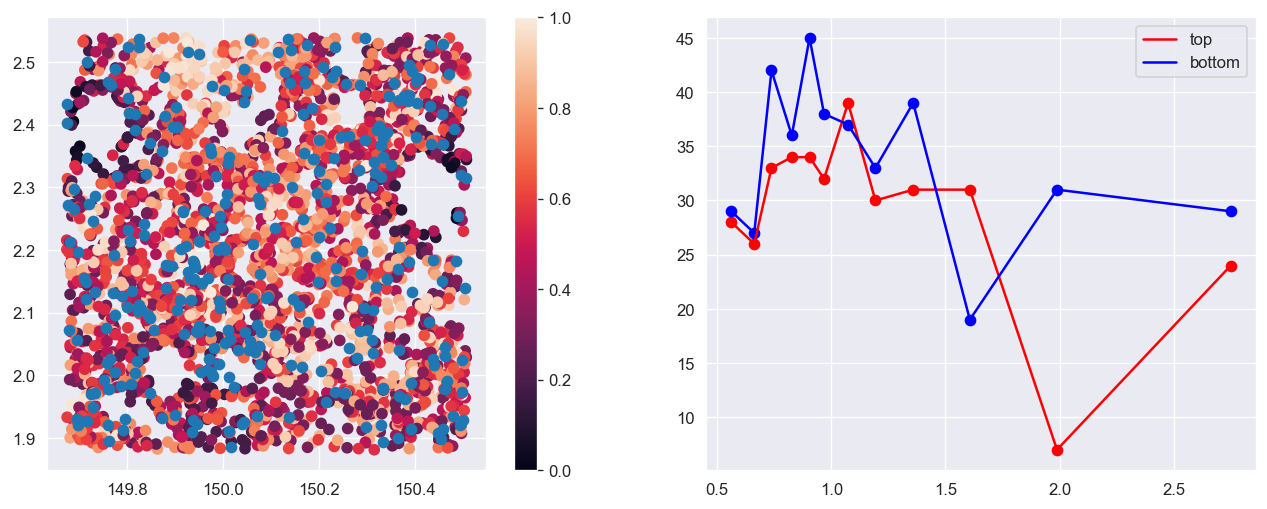

In [207]:
# 考察sub_data，merger实际分布

# r_kpc=[20,40,60,80,100,200,400,500,800,1000,1200,1400,2000,2200,2600,3000]
cd=sub_data_2

r_kpc=2000

plt.figure(figsize=(13,5),dpi=120)
#fig_1
sub_data_c_t=cd[cd['merger']==0]
sub_data_m_t=cd[cd['merger']==1]
plt.subplot(121)
exec("plt.scatter(sub_data_c_t['RA'],sub_data_c_t['DEC'],c=sub_data_c_t['density_{}'])".format(r_kpc))
plt.scatter(sub_data_m_t['RA'],sub_data_m_t['DEC'])
plt.colorbar()


#fig_2
exec("tem=cd.sort_values('density_{}',ascending=False)".format(r_kpc))
t_t=tem.iloc[:200,:]
t_b=tem.iloc[-200:,:]

i=0
list_kde_top,list_kde_botttom=[],[]
list_merger_top,list_merger_botttom=[],[]
list_z=[]

while i < bins:
    exec("tem=sub_data_{}.sort_values('density_{}',ascending=False)".format(i+1,r_kpc))
    i+=1

    list_z.append(np.float(np.average(tem['photoz'])))

    t_t=tem.iloc[:300,:]
    t_b=tem.iloc[-300:,:]

    exec("list_kde_top.append(np.average(t_t['density_{}']))".format(r_kpc))
    exec("list_kde_botttom.append(np.average(t_b['density_{}']))".format(r_kpc))

    list_merger_top.append(np.sum(t_t['merger']))
    list_merger_botttom.append(np.sum(t_b['merger']))

plt.subplot(122)
plt.plot(list_z[:],list_merger_top[:],c='r',label='top')
plt.plot(list_z[:],list_merger_botttom[:],c='b',label='bottom')
plt.legend()

plt.scatter(list_z[:],list_merger_top[:],c='r')
plt.scatter(list_z[:],list_merger_botttom[:],c='b')

In [208]:
# r_kpc=[20,40,60,80,100,200,400,500,800,1000,1200,1400,2000,2200,2600,3000]

def fig(cd,r_kpc):

    #plt.figure(figsize=(6,5),dpi=120)

    #fig_1
    sub_data_c_t=cd[cd['merger']==0]
    sub_data_m_t=cd[cd['merger']==1]
    exec("plt.scatter(sub_data_c_t['RA'],sub_data_c_t['DEC'],c=sub_data_c_t['density_{}'],s=20)".format(r_kpc))
    plt.scatter(sub_data_m_t['RA'],sub_data_m_t['DEC'],marker='^',s=25)
    plt.colorbar()

merger的分布在低红移下更明显，
讨论？高红移不明显的原因？

C:\Users\LiYibo\AppData\Local\Temp\ipykernel_10236\1959405597.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


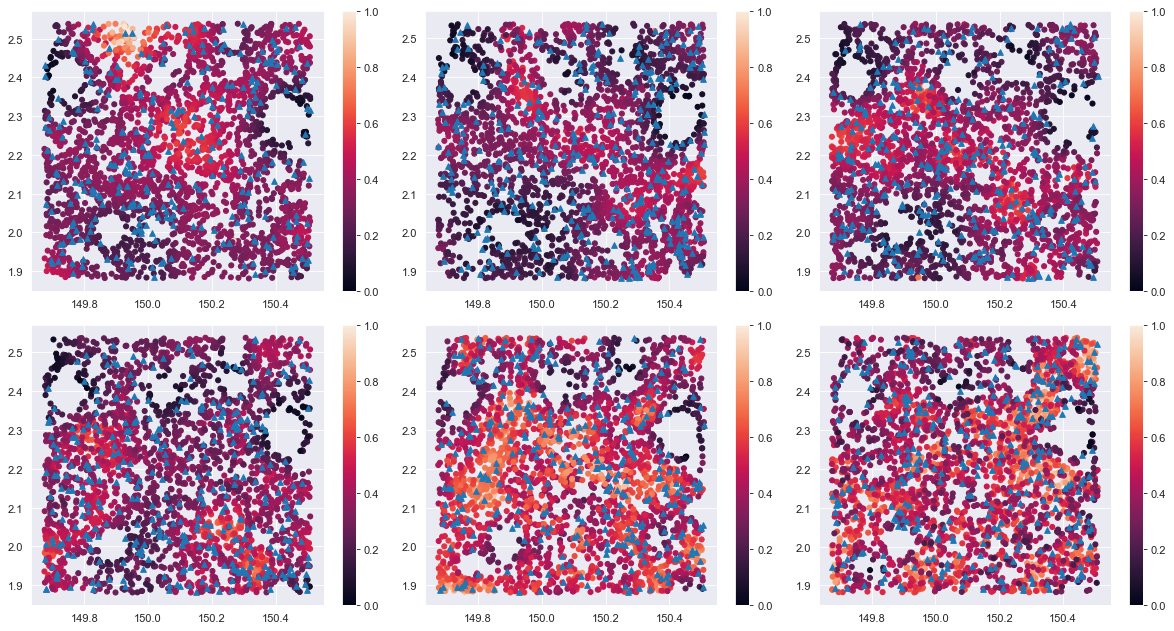

In [174]:
scale=100


plt.figure(figsize=(15,8),dpi=80)

plt.subplot(2,3,1)
fig(sub_data_2,scale)

plt.subplot(2,3,2)
fig(sub_data_4,scale)

plt.subplot(2,3,3)
fig(sub_data_6,scale)

plt.subplot(2,3,4)
fig(sub_data_8,scale)

plt.subplot(2,3,5)
fig(sub_data_10,scale)

plt.subplot(2,3,6)
fig(sub_data_12,scale)

plt.tight_layout()

C:\Users\LiYibo\AppData\Local\Temp\ipykernel_10236\1394205710.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


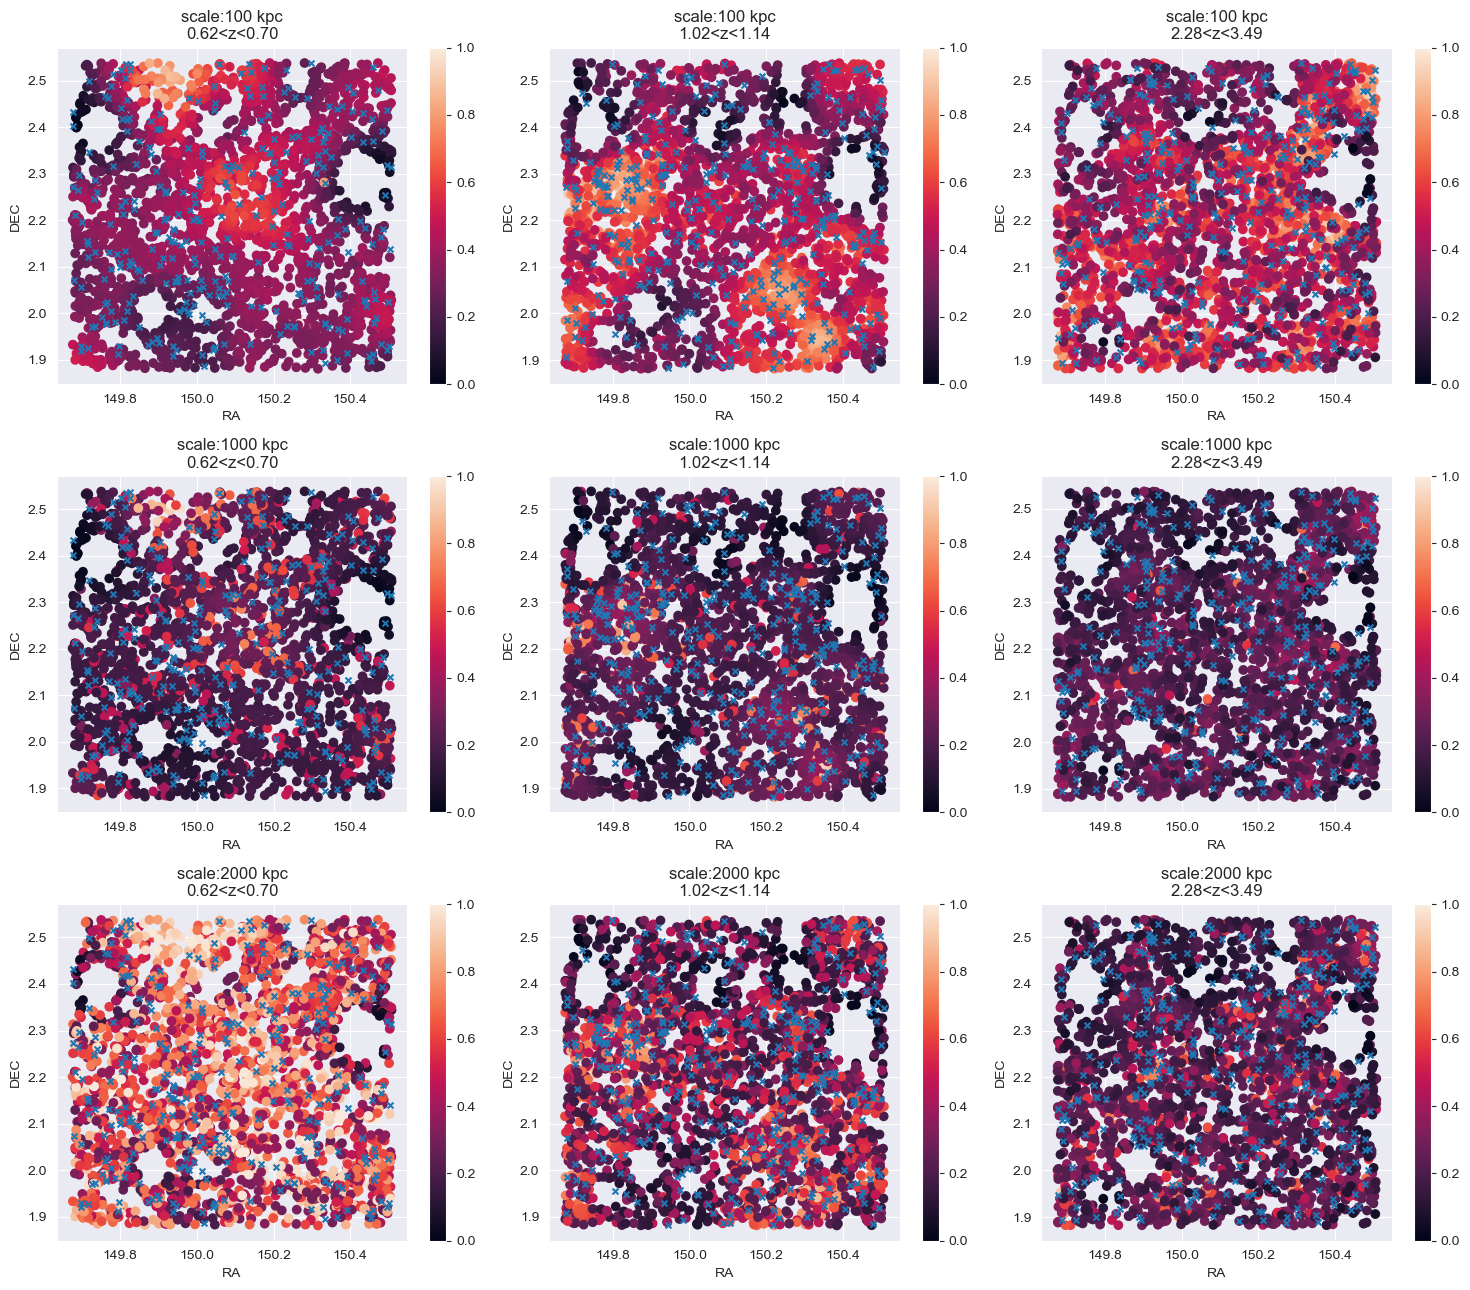

In [63]:
# r_kpc=[20,40,60,80,100,200,400,500,800,1000,1200,1400,2000,2200,2600,3000]

def fig_(cd,r_kpc):

    #plt.figure(figsize=(6,5),dpi=120)

    #fig_1
    sub_data_c_t=cd[cd['merger']==0]
    sub_data_m_t=cd[cd['merger']==1]
    exec("plt.scatter(sub_data_c_t['RA'],sub_data_c_t['DEC'],c=sub_data_c_t['density_{}'])".format(r_kpc))
    plt.title('scale:{} kpc\n{:.2f}<z<{:.2f}'.format(st,zt1,zt2))
    plt.scatter(sub_data_m_t['RA'],sub_data_m_t['DEC'],marker='x',s=18)
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()

plt.figure(figsize=(15,13),dpi=100)

t=1
for scale in [100,1000,2000]:
    for i in [1,6,11]:
            plt.subplot(3,3,t)
            exec("ttt=sub_data_{}".format(i+1))
            st,zt1,zt2=scale,min(ttt['photoz']),max(ttt['photoz'])
            exec("fig_(ttt,scale)")
            t+=1

plt.tight_layout()
# plt.savefig('merger_dis.png',dpi=350)

#### merger的SF随环境的变化
以1000kpc处为指标

#### merger在极端density的样本所占比例

In [178]:
data_add_merger=data_add_merger_sort_z  # 包含所有红移区间
print('z: ',min(data_add_merger['photoz']),max(data_add_merger['photoz']))


# 高density样本和低density样本
align=int(len(data_add_merger)/9)
data_sort_kde=data_add_merger.sort_values('density_1000')
data_kde_L,data_kde_H=data_sort_kde.iloc[:align],data_sort_kde.iloc[-align:]



# 统计高kde与低kde样本中merger的比例:
r1=sum(data_kde_H['merger']) / len(data_kde_H)
r2=sum(data_kde_L['merger']) / len(data_kde_L)

print('high density:',sum(data_kde_H['merger']) / len(data_kde_H))
print('low density:',sum(data_kde_L['merger']) / len(data_kde_L))
print('difference over than low-density:{:.3f}'.format(100*(np.abs(r1-r2)/r2)),'%')

z:  0.5001 3.4995
high density: 0.10487641950567803
low density: 0.10465375194834113
difference over than low-density:0.213 %


##### high density

In [176]:
# 高kde,不同ssfr的样本

a=int(len(data_kde_H)/5)

data_kde_H_sort_ssfr=data_kde_H.sort_values('ssfr')
data_kde_H_l_ssfr=data_kde_H_sort_ssfr.iloc[:a]
data_kde_H_h_ssfr=data_kde_H_sort_ssfr.iloc[-a:]

r1,r2=np.sum(data_kde_H_l_ssfr['merger'])/len(data_kde_H_l_ssfr['merger']),np.sum(data_kde_H_h_ssfr['merger'])/len(data_kde_H_h_ssfr['merger'])

print('low SF: ',r1)
print('high SF: ',r2)
print('difference over than low-density:{:.3f}'.format(100*(np.abs(r1-r2)/r1)),'%')

low SF:  0.08908685968819599
high SF:  0.10022271714922049
difference over than low-density:12.500 %


##### low kde

merger对SF的淬火作用随红移增大而增大
低红移下表现为促进
高红移抑制SF

In [177]:
# 低kde,不同ssfr的样本

a=int(len(data_kde_L)/5)

data_kde_L_sort_ssfr=data_kde_L.sort_values('ssfr')
data_kde_L_h_ssfr=data_kde_L_sort_ssfr.iloc[-a:]
data_kde_L_l_ssfr=data_kde_L_sort_ssfr.iloc[:a]

r1,r2=np.sum(data_kde_L_l_ssfr['merger'])/len(data_kde_L_l_ssfr['merger']),np.sum(data_kde_L_h_ssfr['merger'])/len(data_kde_L_h_ssfr['merger'])

print('low KDE and low SF: ',r1)
print('low KDE and high SF: ',r2)
print('difference over than low-density:{:.3f}'.format(100*(np.abs(r1-r2)/r1)),'%')

low KDE and low SF:  0.08351893095768374
low KDE and high SF:  0.12138084632516703
difference over than low-density:45.333 %


In [187]:
# new

In [193]:
bins=12     # former:12
c=int(len(data_add_merger_sort_cut_top_density_sort_z)/bins)

i=0
while i < bins:
    exec('sub_data_{}=data_add_merger_sort_cut_top_density_sort_z.iloc[(i*c):(i+1)*c]'.format(i+1))
    i+=1

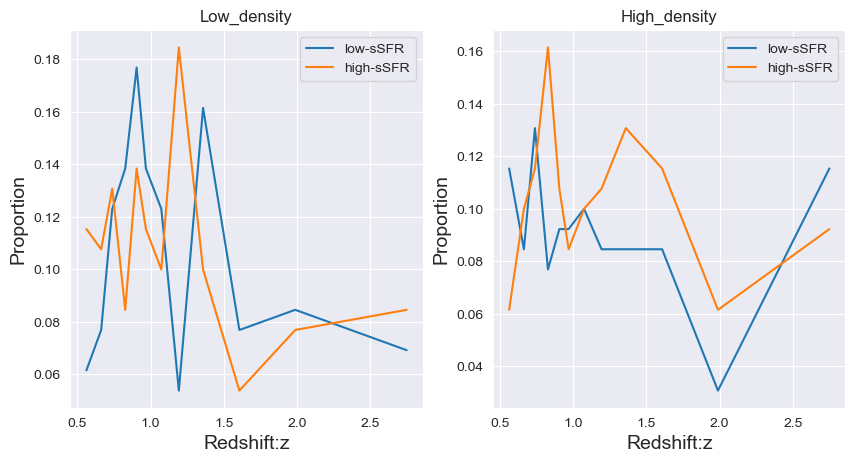

In [195]:
kde_H_total,kde_L_total=[],[]
L_kde_H_SF,L_kde_L_SF,diff_L_kde=[],[],[]
H_kde_H_SF,H_kde_L_SF,diff_H_kde=[],[],[]
z=[]

for i in range(bins):
    i+=1
    exec("data_add_merger = sub_data_{}".format(i))

    z.append(np.mean(data_add_merger['photoz']))
    #### merger在特殊KDE的样本所占比例
    # 高KDE样本和低KDE样本
    align = int(len(data_add_merger) / 5)
    data_sort_kde = data_add_merger.sort_values('density_2000', ascending=False)
    data_kde_H, data_kde_L = data_sort_kde.iloc[:align], data_sort_kde.iloc[-align:]
    # 统计高kde与低kde样本中merger的比例:

    kde_H_total.append(sum(data_kde_H['merger']) / len(data_kde_H))
    kde_L_total.append((data_kde_L['merger']) / len(data_kde_L))



    ##### high kde
    # 高kde,不同ssfr的样本

    a = int(len(data_kde_H) / 5)

    data_kde_H_sort_ssfr = data_kde_H.sort_values('ssfr')
    data_kde_H_l_ssfr = data_kde_H_sort_ssfr.iloc[:a]
    data_kde_H_h_ssfr = data_kde_H_sort_ssfr.iloc[-a:]

    r1, r2 = np.sum(data_kde_H_l_ssfr['merger']) / len(data_kde_H_l_ssfr['merger']), np.sum(
        data_kde_H_h_ssfr['merger']) / len(data_kde_H_h_ssfr['merger'])

    H_kde_L_SF.append(r1)
    H_kde_H_SF.append(r2)
    diff_H_kde.append(np.abs(r1 - r2) / r1)
    ##### low kde


    # 低kde,不同ssfr的样本

    a = int(len(data_kde_L) / 5)

    data_kde_L_sort_ssfr = data_kde_L.sort_values('ssfr')
    data_kde_L_h_ssfr = data_kde_L_sort_ssfr.iloc[-a:]
    data_kde_L_l_ssfr = data_kde_L_sort_ssfr.iloc[:a]

    r1, r2 = np.sum(data_kde_L_l_ssfr['merger']) / len(data_kde_L_l_ssfr['merger']), np.sum(
        data_kde_L_h_ssfr['merger']) / len(data_kde_L_h_ssfr['merger'])


    L_kde_L_SF.append(r1)
    L_kde_H_SF.append(r2)
    diff_L_kde.append(np.abs(r1 - r2) / r1)





plt.figure(figsize=(10,5),dpi=100)
plt.grid(False)

plt.subplot(121)
plt.title('Low_density')
plt.plot(z,L_kde_L_SF,label='low-sSFR')
plt.plot(z,L_kde_H_SF,label='high-sSFR')
plt.xlabel('Redshift:z',fontsize=14)
plt.ylabel('Proportion',fontsize=14)
plt.legend()


plt.subplot(122)
plt.title('High_density')
plt.plot(z,H_kde_L_SF,label='low-sSFR')
plt.plot(z,H_kde_H_SF,label='high-sSFR')
plt.xlabel('Redshift:z',fontsize=14)
plt.ylabel('Proportion',fontsize=14)
plt.legend()


# plt.savefig('propotion.png',dpi=300)